<a href="https://colab.research.google.com/github/shadiyahamza/assignment/blob/main/mainpipeline_crop_yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split#for train test split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler#encoding and scaling
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline#for pipeline
from sklearn.linear_model import LinearRegression
import pickle

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#pca
from sklearn.decomposition import PCA

#pickle
import pickle

#Loading dataset

In [ ]:
df_agr=pd.read_csv('/content/crop_yield.csv',na_values=["nan", "NaN", "NULL", "N/A"])

#EDA

In [ ]:
df_agr.head() #shows you just the first 5 rows of the DataFrame (by default).

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [ ]:
df_agr.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [ ]:
df_agr.shape

(1000000, 10)

In [ ]:
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [ ]:
df_agr.describe(include="all")

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
count,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000,1000000,1000000,1000000.000000,1000000.000000
unique,4,6,6,NaN,NaN,2,2,3,NaN,NaN
top,North,Sandy,Maize,NaN,NaN,False,False,Sunny,NaN,NaN
freq,250173,167119,166824,NaN,NaN,500060,500509,333790,NaN,NaN
mean,NaN,NaN,NaN,549.981901,27.504965,NaN,NaN,NaN,104.495025,4.649472
std,NaN,NaN,NaN,259.851320,7.220608,NaN,NaN,NaN,25.953412,1.696572
min,NaN,NaN,NaN,100.000896,15.000034,NaN,NaN,NaN,60.000000,-1.147613
25%,NaN,NaN,NaN,324.891090,21.254502,NaN,NaN,NaN,82.000000,3.417637
50%,NaN,NaN,NaN,550.124061,27.507365,NaN,NaN,NaN,104.000000,4.651808
75%,NaN,NaN,NaN,774.738520,33.753267,NaN,NaN,NaN,127.000000,5.879200


In [ ]:
df_agr.isnull().sum() / len(df_agr) * 100   # percentage missing

,0
Region,0.0
Soil_Type,0.0
Crop,0.0
Rainfall_mm,0.0
Temperature_Celsius,0.0
Fertilizer_Used,0.0
Irrigation_Used,0.0
Weather_Condition,0.0
Days_to_Harvest,0.0
Yield_tons_per_hectare,0.0


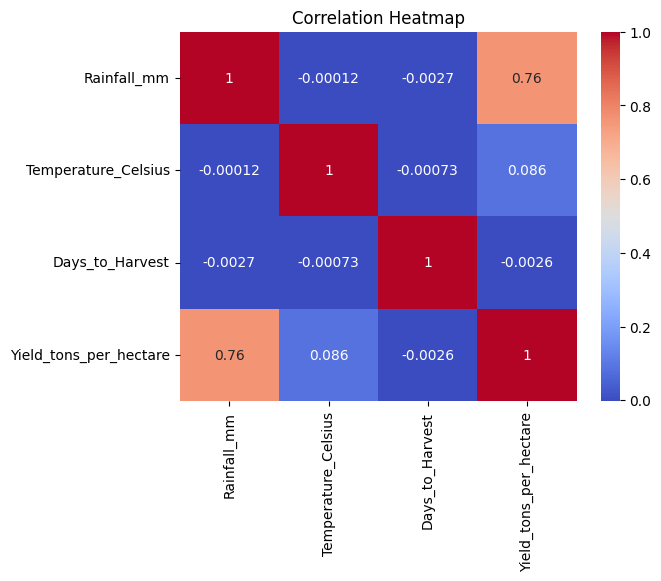

In [ ]:
num_features = ["Rainfall_mm", "Temperature_Celsius", "Days_to_Harvest"]

# Correlation heatmap
corr = df_agr[num_features + ["Yield_tons_per_hectare"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Rainfall_mm Yield_tons_per_hectare = 0.76
Strong positive correlation. More rainfall tends to increase yield.

Temperature_Celsius Yield = 0.086
Very weak relationship almost negligible


Days_to_Harvest  Yield = -0.026
Almost no relationship.

preprocessing

#missing value checking

In [ ]:
#checking for null values in each columns
df_agr.isnull().sum()

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


#Outlier analysis

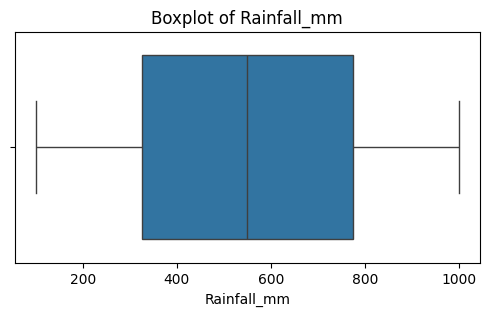

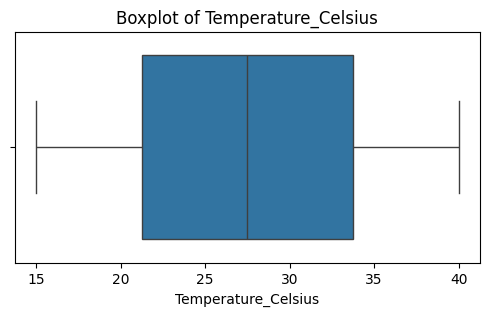

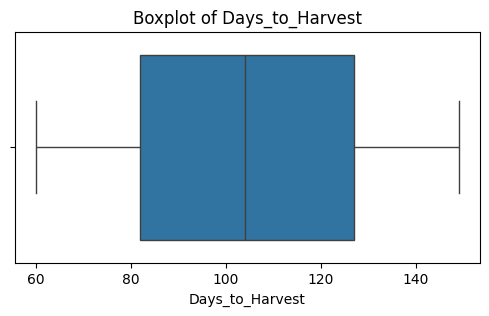

In [ ]:
#extracted the numeric columns
num_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest',]

#plotted each of the numerical values
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_agr[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Numerically checking for outliers

In [ ]:
for col in num_cols:
  Q1 = df_agr[col].quantile(0.25)
  Q3 = df_agr[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  outliers = df_agr[(df_agr[col] < lower) | (df_agr[col] > upper)]
  print(f"{col}: {len(outliers)} outliers")

Rainfall_mm: 0 outliers
Temperature_Celsius: 0 outliers
Days_to_Harvest: 0 outliers


#splitting features

In [ ]:

# Features (X) and Target (y)
X = df_agr.drop("Yield_tons_per_hectare", axis=1)
y = df_agr["Yield_tons_per_hectare"]


In [ ]:
X.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest'],
      dtype='object')

In [ ]:
numerical_features = ["Rainfall_mm", "Temperature_Celsius", "Days_to_Harvest"]
categorical_features = ["Region", "Soil_Type", "Crop", "Weather_Condition",'Fertilizer_Used', 'Irrigation_Used']


Building pipeline for preprocessing

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numerical_features),
        ("cat", Pipeline([
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_features)
    ]
)

entire pipeline for model building and preprocessing

In [ ]:

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Rainfall_mm',
                                                   'Temperature_Celsius',
                                                   'Days_to_Harvest']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Region', 'Soil_Type',
                                                   'Crop', 'Weather_Condition',
                                                   'Fertilizer_Used',
                                                   'Irrigation_Used'])])),
                ('regressor', LinearRegression())])

In [ ]:
# prediction on raw test set
y_pred = pipeline.predict(X_test)

# prediction on a new raw sample
new_data = pd.DataFrame([{
    "Region": "East",
    "Soil_Type": "Clay",
    "Crop": "Rice",
    "Rainfall_mm": 250,
    "Temperature_Celsius": 30,
    "Fertilizer_Used": True,
    "Irrigation_Used": True,
    "Weather_Condition": "Sunny",
    "Days_to_Harvest": 120
}])


print(pipeline.predict(new_data))


[4.55473695]


In [ ]:
# Suppose your pipeline variable is named `pipeline`
with open("final_pipeline_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)

In [ ]:
# Load pipeline
with open("final_pipeline_model.pkl", "rb") as f:
    loaded_pipeline = pickle.load(f)


In [ ]:
# Example raw input (no scaling/encoding needed!)

new_input = pd.DataFrame([{
    "Rainfall_mm": 450,
    "Temperature_Celsius": 34,
    "Days_to_Harvest": 98,
    "Region": "East",
    "Soil_Type": "Clay",
    "Crop": "Rice",
    "Weather_Condition": "Sunny"
}])

# Predict
prediction = loaded_pipeline.predict(new_input)
print("Predicted Yield:", prediction[0])


Predicted Yield: 4.281050237820338


Linear Regression model

In [ ]:
import pickle

# load pickle file
with open("final_pipeline_model.pkl", "rb") as f:
    obj = pickle.load(f)

print(type(obj))  # see what kind of object it is


<class 'sklearn.pipeline.Pipeline'>
